In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
# https://stackoverflow.com/questions/33480297/viewing-npy-images

In [2]:
img_array = np.load('imgs.npy')

In [3]:
img_array.shape

(1589, 256, 256)

# Read the data

In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
len(df_train), len(df_test)

(1289, 300)

In [6]:
df_train.head()

,Row_number,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,...,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Image,Death,Prognosis
0,228.0,D,35.913889,0,1.0,39.3,3.0,1.0,0.0,5.76,...,0.0,0.0,0.0,0.0,NaN,1.0,0.0,36,0,MILD
1,229.0,D,57.266667,0,1.0,37.0,3.0,0.0,0.0,11.48,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,37,0,MILD
2,96.0,A,39.000000,1,1.0,37.2,2.0,1.0,0.0,10.17,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20,0,MILD
3,112.0,A,44.000000,0,1.0,38.0,3.0,1.0,0.0,6.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66,0,SEVERE
4,97.0,A,76.000000,0,1.0,38.6,1.0,1.0,0.0,17.72,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,21,0,MILD


In [7]:
df_test.head()

,Row_number,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,...,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Image
0,82.0,A,72.000000,1,1.0,37.3,3.0,1.0,0.0,5.370000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
1,236.0,D,60.791667,1,1.0,37.0,2.0,1.0,0.0,6.370000,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,46
2,251.0,D,51.983333,0,1.0,38.5,4.0,1.0,0.0,12.130000,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,63
3,238.0,D,62.891667,0,1.0,NaN,NaN,0.0,1.0,0.509028,...,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,1.0,48
4,266.0,E,44.000000,0,0.0,37.7,4.0,0.0,0.0,9.180000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,502


In [8]:
set(df_train["Image"].values) & set(df_test["Image"].values) # empty set

set()

In [9]:
df_test["Image"]

0         4
1        46
2        63
3        48
4       502
       ... 
295     844
296     943
297    1082
298     856
299     994
Name: Image, Length: 300, dtype: int64

In [10]:
pd.crosstab(df_train["Death"],df_train["Prognosis"])

Prognosis,MILD,SEVERE
Death,,
0,683,400
1,7,199


In [11]:
df_train["Prognosis"].value_counts()

MILD      690
SEVERE    599
Name: Prognosis, dtype: int64

In [12]:
df_train.columns

Index(['Row_number', 'Hospital', 'Age', 'Sex', 'PositivityAtAdmission',
       'Temp_C', 'DaysFever', 'Cough', 'DifficultyInBreathing', 'WBC', 'RBC',
       'CRP', 'Fibrinogen', 'Glucose', 'PCT', 'LDH', 'INR', 'D_dimer',
       'Ox_percentage', 'PaO2', 'SaO2', 'PaCO2', 'pH', 'CardiovascularDisease',
       'IschemicHeartDisease', 'AtrialFibrillation', 'HeartFailure', 'Ictus',
       'HighBloodPressure', 'Diabetes', 'Dementia', 'BPCO', 'Cancer',
       'ChronicKidneyDisease', 'RespiratoryFailure', 'Obesity', 'Position',
       'Image', 'Death', 'Prognosis'],
      dtype='object')

In [13]:
df_test.columns

Index(['Row_number', 'Hospital', 'Age', 'Sex', 'PositivityAtAdmission',
       'Temp_C', 'DaysFever', 'Cough', 'DifficultyInBreathing', 'WBC', 'RBC',
       'CRP', 'Fibrinogen', 'Glucose', 'PCT', 'LDH', 'INR', 'D_dimer',
       'Ox_percentage', 'PaO2', 'SaO2', 'PaCO2', 'pH', 'CardiovascularDisease',
       'IschemicHeartDisease', 'AtrialFibrillation', 'HeartFailure', 'Ictus',
       'HighBloodPressure', 'Diabetes', 'Dementia', 'BPCO', 'Cancer',
       'ChronicKidneyDisease', 'RespiratoryFailure', 'Obesity', 'Position',
       'Image'],
      dtype='object')

In [14]:
len(df_train.columns), len(df_test.columns)

(40, 38)

In [15]:
df_train.iloc[10]["Prognosis"]

'MILD'

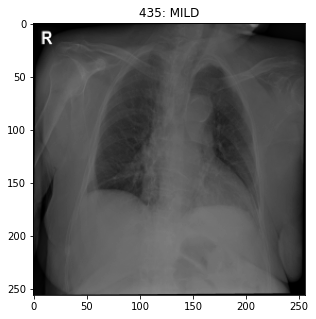

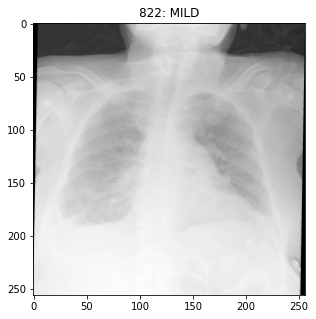

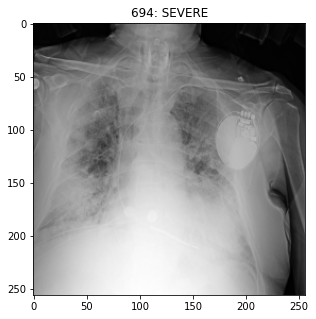

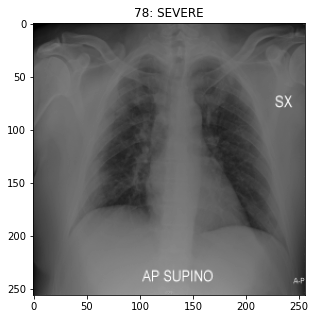

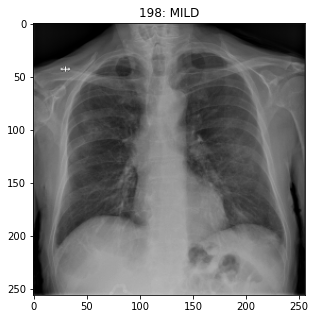

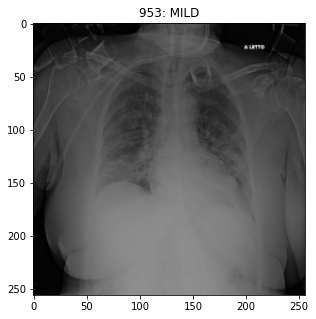

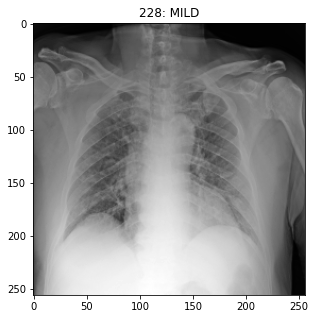

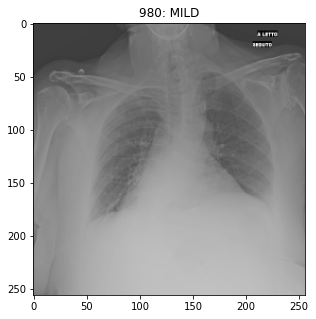

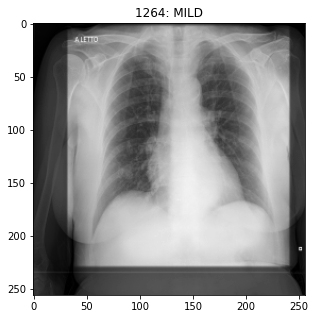

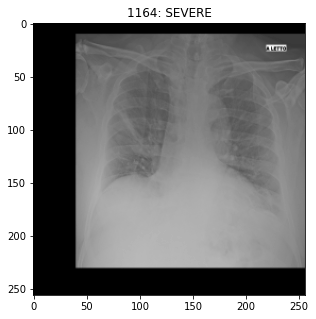

In [16]:
for i in range(10):
    plt.figure(figsize=(5,5))
    ind = np.random.randint(len(df_train))
    
    illness = df_train.iloc[ind]["Prognosis"]
    
    plt.imshow(img_array[ind], cmap='gray')
    plt.title(f"{ind}: {illness}")
    plt.show()

# Baseline model

In [17]:
df_train.isna().sum()>len(df_train)*0.15

Row_number               False
Hospital                 False
Age                      False
Sex                      False
PositivityAtAdmission    False
Temp_C                   False
DaysFever                 True
Cough                    False
DifficultyInBreathing    False
WBC                      False
RBC                      False
CRP                      False
Fibrinogen                True
Glucose                  False
PCT                       True
LDH                       True
INR                       True
D_dimer                   True
Ox_percentage             True
PaO2                      True
SaO2                      True
PaCO2                     True
pH                        True
CardiovascularDisease     True
IschemicHeartDisease      True
AtrialFibrillation        True
HeartFailure              True
Ictus                     True
HighBloodPressure        False
Diabetes                 False
Dementia                 False
BPCO                     False
Cancer  

In [18]:
df_train_small = df_train.dropna(axis=1)

In [19]:
df_train_small

,Row_number,Hospital,Sex,Image,Death,Prognosis
0,228.0,D,0,36,0,MILD
1,229.0,D,0,37,0,MILD
2,96.0,A,1,20,0,MILD
3,112.0,A,0,66,0,SEVERE
4,97.0,A,0,21,0,MILD
...,...,...,...,...,...,...
1284,1474.0,F,1,960,0,MILD
1285,1228.0,F,0,608,0,SEVERE
1286,1466.0,F,1,744,0,MILD
1287,1210.0,F,0,940,0,MILD


In [20]:
df_train_small = df_train_small.drop(["Death","Image"],axis=1)

In [21]:
df_train_small

,Row_number,Hospital,Sex,Prognosis
0,228.0,D,0,MILD
1,229.0,D,0,MILD
2,96.0,A,1,MILD
3,112.0,A,0,SEVERE
4,97.0,A,0,MILD
...,...,...,...,...
1284,1474.0,F,1,MILD
1285,1228.0,F,0,SEVERE
1286,1466.0,F,1,MILD
1287,1210.0,F,0,MILD


In [22]:
df_train_small["Prognosis"] = df_train_small["Prognosis"].replace({'MILD': 0, 'SEVERE':1})

In [23]:
df_train_small["Row_number"]

0        228.0
1        229.0
2         96.0
3        112.0
4         97.0
         ...  
1284    1474.0
1285    1228.0
1286    1466.0
1287    1210.0
1288    1213.0
Name: Row_number, Length: 1289, dtype: float64

In [24]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

In [25]:
#transformer = RobustScaler().fit(df_train_small["Row_number"].values.reshape(-1,1))
#transformer = StandardScaler().fit(df_train_small["Row_number"].values.reshape(-1,1))
transformer = MinMaxScaler().fit(df_train_small["Row_number"].values.reshape(-1,1))

In [26]:
df_train_small["Row_number"] = transformer.transform(df_train_small["Row_number"].values.reshape(-1,1))

In [27]:
df_train_small

,Row_number,Hospital,Sex,Prognosis
0,0.140557,D,0,0
1,0.141176,D,0,0
2,0.058824,A,1,0
3,0.068731,A,0,1
4,0.059443,A,0,0
...,...,...,...,...
1284,0.912074,F,1,0
1285,0.759752,F,0,1
1286,0.907121,F,1,0
1287,0.748607,F,0,0


In [28]:
df_train_small = pd.get_dummies(df_train_small)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_train_small.drop("Prognosis",axis=1),df_train_small["Prognosis"], test_size=0.25, random_state=42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((966, 8), (323, 8), (966,), (323,))

In [32]:
from sklearn.svm import SVC

In [33]:
X_train

,Row_number,Sex,Hospital_A,Hospital_B,Hospital_C,Hospital_D,Hospital_E,Hospital_F
1217,0.840867,1,0,0,0,0,0,1
526,0.013003,1,1,0,0,0,0,0
807,0.496594,0,0,0,1,0,0,0
755,0.327554,0,0,0,0,0,0,1
1105,0.934365,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
1044,0.717028,1,0,0,0,0,0,1
1095,0.747368,1,0,0,0,0,0,1
1130,0.834675,1,0,0,0,0,0,1
860,0.583282,0,0,0,0,0,0,1


In [34]:
clf = SVC(kernel = "linear")

In [35]:
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [36]:
y_pred = clf.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [38]:
balanced_accuracy_score(y_pred,y_test), accuracy_score(y_pred,y_test)

(0.539918414918415, 0.544891640866873)

In [39]:
from xgboost import XGBClassifier

In [40]:
clf = XGBClassifier(max_depth = 4, 
                    n_estimators = 200,
                    use_label_encoder = False,
                    eval_metric = 'logloss',
                    eta = 0.05,
                    subsample = 0.9,
                    colsample_bytree = 0.9,
                   )#reg_lambda = 0.1)

clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eta=0.05, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.0500000007,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [41]:
y_pred = clf.predict(X_test)

In [42]:
balanced_accuracy_score(y_pred,y_test), accuracy_score(y_pred,y_test)

(0.5526063258099185, 0.5541795665634675)